# Analiza danych zarobków graczy NBA


**Spis treści**<a id='toc0_'></a>

- 1. [Cel projektu](#toc1_)
- 2. [Biblioteki użyte w analizie danych](#toc2_)
  - 2.1. [Pandas](#toc2_1_)
  - 2.2. [Matplotlib](#toc2_2_)
  - 2.3. [Seaborn](#toc2_3_)
  - 2.4. [Numpy](#toc2_4_)
  - 2.5. [IPython Display](#toc2_5_)
- 3. [Biblioteki użyte w tworzeniu modeli predykcyjnych](#toc3_)
  - 3.1. [Scikit-learn](#toc3_1_)
- 4. [Pobranie danych](#toc4_)
- 5. [Oczyszczenie danych](#toc5_)
  - 5.1. [Oczyszczenie nie pełnych danych](#toc5_1_)
- 6. [Wyznaczaczenie podstawtowych miar statycznych](#toc6_)
- 7. [Podstawowe wykresy związne z wynagrodzeniem](#toc7_)
  - 7.1. [Top 20 najlepiej zarabiających zawodników NBA w sezonie 2022/2023](#toc7_1_)
  - 7.2. [Top 10 najlepiej zarabiających zawodników za minutę gry](#toc7_2_)
  - 7.3. [Średnie zarobki zawodników NBA w zależności od grup wiekowych](#toc7_3_)
- 8. [Wyznaczenie korelacji](#toc8_)
  - 8.1. [Obliczanie wartości korelacji](#toc8_1_)
  - 8.2. [Heatmapa korelacji danych w zbiorze](#toc8_2_)
  - 8.3. [Wartości korelacji dla wynagrodzenia](#toc8_3_)
  - 8.4. [Wykresy punktowy obrazującę korelacje wynagrodzenia ze średnią ilość punktów na mecz, wskaźnikiem VORP oraz średnią ilością minut na mecz](#toc8_4_)
- 9. [Stworzenie modelów predkcyjnych](#toc9_)
  - 9.1. [Przygotowanie danych pod modele](#toc9_1_)
  - 9.2. [Trening modeli i ocena ich jakości](#toc9_2_)
  - 9.3. [KNeighborsRegressor](#toc9_3_)
  - 9.4. [LinearRegression](#toc9_4_)
  - 9.5. [Porównanie modelów](#toc9_5_)
- 10. [Wyznaczenie najbardziej przepłaconych i nie dopłaconych zawodników](#toc10_)

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->


## 1. <a id='toc1_'></a>[Cel projektu](#toc0_)

Celem projektu jest analiza danych dotyczących zarobków graczy NBA w sezonie 2022/2023. Projekt ma na celu:

- Wizualne przedstawienie danych ze zbioru danych
- Zbadanie zależności między statystykami zawodników a ich wynagrodzeniem.
- Stworzenie modeli predykcyjnych, które oszacują wysokość zarobków na podstawie dostępnych statystyk.
- Wyciągnięcie wniosków, które mogą być przydatne dla drużyn NBA przy ocenie wartości zawodników.


## 2. <a id='toc2_'></a>[Biblioteki użyte w analizie danych](#toc0_)

### 2.1. <a id='toc2_1_'></a>[Pandas](#toc0_)

Pandas to biblioteka do pracy z danymi w formacie tabelarycznym, umożliwiająca wczytywanie, manipulację, analizę i przekształcanie danych.

### 2.2. <a id='toc2_2_'></a>[Matplotlib](#toc0_)

Matplotlib to biblioteka do tworzenia wizualizacji danych w Pythonie. Umożliwia generowanie wykresów oraz pełną kontrolę nad ich wyglądem.

### 2.3. <a id='toc2_3_'></a>[Seaborn](#toc0_)

Seaborn to biblioteka do tworzenia estetycznych i zaawansowanych wizualizacji danych. Jest zintegrowana z Pandas i wspiera szybkie tworzenie wykresów złożonych.

### 2.4. <a id='toc2_4_'></a>[Numpy](#toc0_)

NumPy to biblioteka do obliczeń matematycznych i operacji na wielowymiarowych tablicach. Stanowi podstawę dla innych narzędzi analitycznych, takich jak Pandas.

### 2.5. <a id='toc2_5_'></a>[IPython Display](#toc0_)

IPython Display ułatwia czytelne wyświetlanie obiektów w notatnikach Jupyter, takich jak tabele danych lub wyniki obliczeń.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
from IPython.display import display

## 3. <a id='toc3_'></a>[Biblioteki użyte w tworzeniu modeli predykcyjnych](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Scikit-learn](#toc0_)

Scikit-learn to jedna z najpopularniejszych bibliotek Python do uczenia maszynowego. Umożliwia implementację klasycznych algorytmów, takich jak regresja, klasyfikacja czy klasteryzacja, oraz dostarcza narzędzi do przetwarzania danych i ewaluacji modeli.


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

## 4. <a id='toc4_'></a>[Pobranie danych](#toc0_)

Do analizy zostały uzyty zbiór danych z Kaggle. Dane zawierają informacje dotyczące zarobków graczy NBA w sezonie 2022/23 oraz wiele danych statystycznych dotyczących ich gry w trakcie sezonu.

[NBA Player Salaries (2022-23 Season)](https://www.kaggle.com/datasets/jamiewelsh2/nba-player-salaries-2022-23-season/data)


In [4]:
data = pd.read_csv("./nba_2022-23_all_stats_with_salary.csv")
print(f"Ilość zawodników: {data.shape[0]}")
print(f"Ilość cech: {data.shape[1]}")
print("Typ danych:\n")
print(data.dtypes)

Ilość zawodników: 467
Ilość cech: 52
Typ danych:

ID                 int64
Player Name       object
Salary             int64
Position          object
Age                int64
Team              object
GP                 int64
GS                 int64
MP               float64
FG               float64
FGA              float64
FG%              float64
3P               float64
3PA              float64
3P%              float64
2P               float64
2PA              float64
2P%              float64
eFG%             float64
FT               float64
FTA              float64
FT%              float64
ORB              float64
DRB              float64
TRB              float64
AST              float64
STL              float64
BLK              float64
TOV              float64
PF               float64
PTS              float64
Total Minutes      int64
PER              float64
TS%              float64
3PAr             float64
FTr              float64
ORB%             float64
DRB%             float64


## 5. <a id='toc5_'></a>[Oczyszczenie danych](#toc0_)

Zbiór danych zawiera bardzo duzo informacji, więc do analizy zostawiamy tylko najabrdziej znaczące dane statystyczne, usuwając wiele zaawansowanych danych które równiez są zbierane.

Najwazniejsze dane jakie zostawiłem to:

- Player Name: Imię i nazwisko zawodnika.
- Salary: Wynagrodzenie zawodnika w danym sezonie.
- Age: Wiek zawodnika w latach.
- `GP` (Games Played): Liczba meczów rozegranych przez zawodnika.
- `MP` (Minutes Played): Średnia liczba minut spędzonych na boisku w meczu.
- `PTS` (Points): Średnia liczba zdobywanych punktów na mecz.
- `AST` (Assists): Średnia liczba asyst na mecz.
- `TRB` (Total Rebounds): Średnia łączna liczba zbiórek (ofensywnych i defensywnych) na mecz.
- `FG%` (Field Goal Percentage): Procent trafionych rzutów z gry.
- `3P%` (3-Point Percentage): Procent trafionych rzutów za 3 punkty.
- `FT%` (Free Throw Percentage): Procent trafionych rzutów wolnych.
- `PER` (Player Efficiency Rating): Zaawansowany wskaźnik efektywności uwzględniający różne statystyki zawodnika.
- `TS%` (True Shooting Percentage): Statystyka ta bazuje na liczbie zdobywanych punktów, a nie trafionych rzutów. Pozwala ona dokładniej oszacować całościową skuteczność graczy, szczególnie tych zdobywających punkty na wiele sposobów. Wzór TS% wyraża się po uproszczeniu jako procent z:
  $$\frac{PTS}{2 * FGA + 0,88 * FTA}  $$
  Gdzie:
  - `PTS` to liczba zdobytych punktów,
  - `FGA` to liczba prób z gry,
  - `FTA` liczba prób z linii rzutów wolnych.
- `BPM` (Box Plus Minus): Metryka oparta na wynikach koszykarza, która szacuje wkład koszykarza w grę drużyny, gdy ten zawodnik jest na boisku.
- `VORP` (Value Over Replacement Player): Wartość ponad zawodnika zastępczego (VORP) przekształca wskaźnik BPM na szacunek ogólnego wkładu każdego zawodnika w drużynę, mierzony w odniesieniu do tego, co teoretyczny „zawodnik zastępczy” mógłby wnieść, gdzie „zawodnik zastępczy” jest zdefiniowany jako zawodnik otrzymujący najniższą pensję lub niebędący normalnym członkiem rotacji zespołu.
- `WS` (Win Shares): Szacunkowa liczba zwycięstw, do których zawodnik się przyczynił, na podstawie jego indywidualnych osiągnięć.


In [5]:
df = data[
    [
        "Player Name",
        "Position",
        "Salary",
        "Team",
        "Age",
        "GP",
        "MP",
        "PTS",
        "AST",
        "TRB",
        "FG%",
        "3P%",
        "FT%",
        "PER",
        "TS%",
        "BPM",
        "VORP",
        "WS",
    ]
]

### 5.1. <a id='toc5_1_'></a>[Oczyszczenie nie pełnych danych](#toc0_)

Po usunięciu nie potrzebnych kolumn, pora sprawdzić czy dane są pełne


In [6]:
print(len(df))
print(df.isnull().sum())

467
Player Name     0
Position        0
Salary          0
Team            0
Age             0
GP              0
MP              0
PTS             0
AST             0
TRB             0
FG%             1
3P%            13
FT%            23
PER             0
TS%             1
BPM             0
VORP            0
WS              0
dtype: int64


Ilość danych z nie pełną ilością danych, nie jest duzy dlatego zawodnicy, nie majacy wszystkich danych zostaną usunięci ze zbioru danych


In [7]:
deleted_players = df[df.isnull().any(axis=1)]

print("Deleted players:")
print(deleted_players.head())

df = df.dropna()

print(len(df))
print(df.isnull().sum())

Deleted players:
           Player Name Position    Salary     Team  Age  GP    MP   PTS  AST  \
75   Mitchell Robinson        C  17045454      NYK   24  59  27.0   7.4  0.9   
133      Mason Plumlee        C   9080417  LAC/CHO   32  79  26.0  10.8  3.1   
221      Dylan Windler       SF   4037277      CLE   26   3   3.3   1.7  0.3   
233      Mark Williams        C   3722040      CHO   21  43  19.3   9.0  0.4   
247     Sterling Brown       SF   3122602      LAL   27   4   6.0   0.0  0.5   

     TRB    FG%  3P%    FT%   PER    TS%  BPM  VORP   WS  
75   9.4  0.671  NaN  0.484  18.9  0.652  2.4   1.7  6.5  
133  8.9  0.680  NaN  0.636  19.6  0.689  2.2   2.2  7.9  
221  0.0  0.667  0.5    NaN  19.0  0.833  6.7   0.0  0.0  
233  7.1  0.637  NaN  0.691  19.8  0.659  0.1   0.4  2.8  
247  2.0  0.000  0.0    NaN   7.0  0.000 -3.3   0.0  0.0  
434
Player Name    0
Position       0
Salary         0
Team           0
Age            0
GP             0
MP             0
PTS            0
AST     

Na późniejsze potrzeby zostanie wydzielony nowy Data Frame, który zawiera tylko wartości numeryczne


In [8]:
df_numeric = df.select_dtypes(include=[np.number])

## 6. <a id='toc6_'></a>[Wyznaczaczenie podstawtowych miar statycznych](#toc0_)


In [9]:
salary_stats = {
    "Statistic": [
        "Count",
        "Mean",
        "Median",
        "Standard Deviation",
        "Minimum",
        "25th Percentile",
        "75th Percentile",
        "Maximum",
    ],
    "Value": [
        df["Salary"].count(),
        df["Salary"].mean(),
        df["Salary"].median(),
        df["Salary"].std(),
        df["Salary"].min(),
        df["Salary"].quantile(0.25),
        df["Salary"].quantile(0.75),
        df["Salary"].max(),
    ],
}

stats_df = pd.DataFrame(salary_stats)

stats_df["Value"] = stats_df["Value"].apply(lambda x: f"{x:,.2f}")

display(stats_df)

,Statistic,Value
0,Count,434.00
1,Mean,"8,918,563.76"
2,Median,"4,114,758.00"
3,Standard Deviation,"10,910,402.58"
4,Minimum,"5,849.00"
5,25th Percentile,"1,904,314.75"
6,75th Percentile,"11,181,476.25"
7,Maximum,"48,070,014.00"


In [10]:
# Funkcja pomocnicza do ładniejszego przedstawiania duzych wartości na wykresach
def format_thousands(x, _):
    return f"{x:,.0f}"

## 7. <a id='toc7_'></a>[Podstawowe wykresy związne z wynagrodzeniem](#toc0_)


### 7.1. <a id='toc7_1_'></a>[Top 20 najlepiej zarabiających zawodników NBA w sezonie 2022/2023](#toc0_)


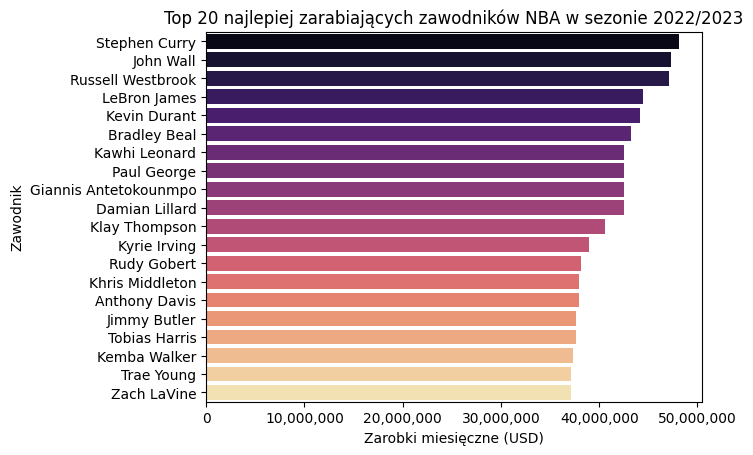

In [11]:
top_20_salary = df.nlargest(20, "Salary")

sns.barplot(
    y="Player Name",
    x="Salary",
    hue="Player Name",
    data=top_20_salary,
    palette="magma",
)
plt.title("Top 20 najlepiej zarabiających zawodników NBA w sezonie 2022/2023")
plt.xlabel("Zarobki miesięczne (USD)")
plt.ylabel("Zawodnik")
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_thousands))
plt.show()

### 7.2. <a id='toc7_2_'></a>[Top 10 najlepiej zarabiających zawodników za minutę gry](#toc0_)


         Player Name Position    Salary     Team  Age  GP    MP   PTS  AST  \
17      Kemba Walker       PG  37281261      DAL   32   9  16.0   8.0  2.1   
70    Jonathan Isaac       PF  17400000      ORL   25  11  11.3   5.0  0.5   
105      Danny Green       SG  11710528  CLE/MEM   35  11  12.5   5.5  0.5   
141     Daniel Theis        C   8694369      IND   30   7  15.6   7.0  1.3   
365  Marko Simonovic        C   1563518      CHI   23   7   2.9   0.9  0.0   
1          John Wall       PG  47345760      LAC   32  34  22.2  11.4  5.2   
312     Tony Bradley        C   2036318      CHI   25  12   2.8   1.6  0.1   
162      Cody Martin       SF   7000000      CHO   27   7  19.1   5.0  1.6   
130     Nerlens Noel        C   9391069  BRK/DET   28  17  11.5   2.1  0.6   
13   Khris Middleton       SF  37984276      MIL   31  33  24.3  15.1  4.9   

     TRB    FG%    3P%    FT%   PER    TS%   BPM  VORP   WS  \
17   1.8  0.421  0.250  0.810  15.0  0.543  -0.3   0.1  0.3   
70   4.0  0.415

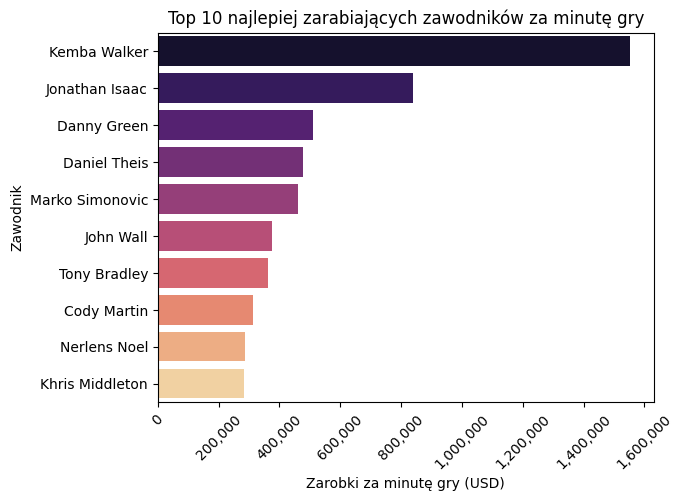

In [12]:
df_salary_analysis = df.copy()

df_salary_analysis["Total Minutes Played"] = (
    df_salary_analysis["MP"] * df_salary_analysis["GP"]
)
df_salary_analysis = df_salary_analysis[df_salary_analysis["Total Minutes Played"] > 0]
df_salary_analysis["Salary Per Minute"] = (
    df_salary_analysis["Salary"] * 6
) / df_salary_analysis["Total Minutes Played"]

top_10_salary_per_minute = df_salary_analysis.nlargest(10, "Salary Per Minute")

print(top_10_salary_per_minute.head(10))

sns.barplot(
    y="Player Name",
    x="Salary Per Minute",
    hue="Player Name",
    data=top_10_salary_per_minute,
    palette="magma",
)
plt.title("Top 10 najlepiej zarabiających zawodników za minutę gry")
plt.xlabel("Zarobki za minutę gry (USD)")
plt.ylabel("Zawodnik")
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_thousands))
plt.xticks(rotation=45)
plt.show()

### 7.3. <a id='toc7_3_'></a>[Średnie zarobki zawodników NBA w zależności od grup wiekowych](#toc0_)


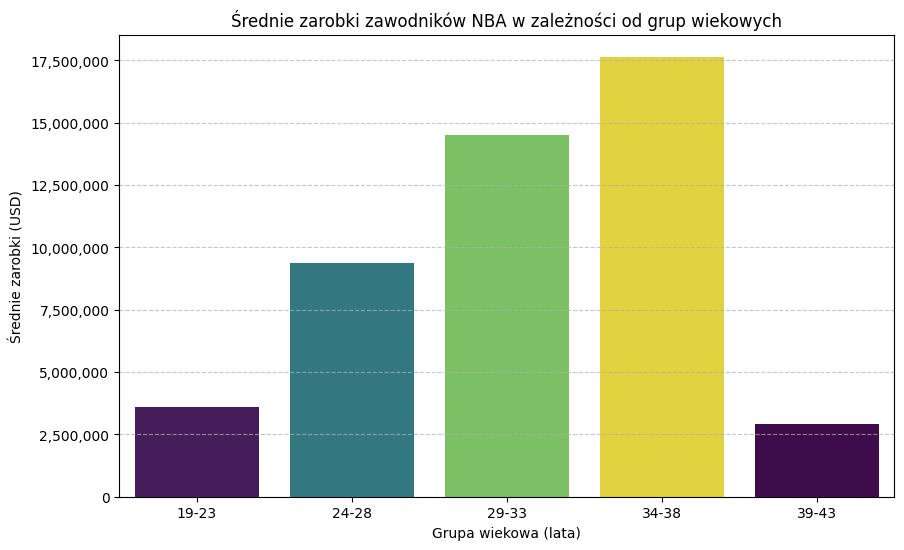

In [13]:
df["Age Group"] = pd.cut(
    df["Age"],
    bins=range(df["Age"].min(), df["Age"].max() + 5, 5),
    right=False,
    labels=[f"{i}-{i+4}" for i in range(df["Age"].min(), df["Age"].max(), 5)],
)

average_salary_by_age_group = (
    df.groupby("Age Group", observed=True)["Salary"].mean().reset_index()
)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="Age Group",
    y="Salary",
    hue="Salary",
    legend=False,
    data=average_salary_by_age_group,
    palette="viridis",
)
plt.title("Średnie zarobki zawodników NBA w zależności od grup wiekowych")
plt.xlabel("Grupa wiekowa (lata)")
plt.ylabel("Średnie zarobki (USD)")
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## 8. <a id='toc8_'></a>[Wyznaczenie korelacji](#toc0_)


### 8.1. <a id='toc8_1_'></a>[Obliczanie wartości korelacji](#toc0_)

Wartości korelacji w macierzy korelacji są obliczane przy użyciu **współczynnika korelacji Pearsona**. Ten współczynnik jest domyślną wartością w `.corr()` w bibliotce `Pandas`. Współczynnik ten mierzy liniową zależność pomiędzy dwiema zmiennymi i jest wyrażony wzorem:

$$
r = \frac{\sum{(X_i - \bar{X})(Y_i - \bar{Y})}}{\sqrt{\sum{(X_i - \bar{X})^2} \cdot \sum{(Y_i - \bar{Y})^2}}}
$$

Gdzie:

- $X_i$ i $Y_i$ to wartości danych dla dwóch zmiennych (np. Salary i PTS).
- $\bar{X}$ i $\bar{Y}$ to średnie wartości danych dla zmiennych $X$ i $Y$.

**Wartości współczynnika korelacji Pearsona**:

- $r = 1$: Pełna dodatnia korelacja (zmienne rosną razem).
- $r = -1$: Pełna ujemna korelacja (jedna zmienna rośnie, druga maleje).
- $r = 0 $: Brak liniowej zależności pomiędzy zmiennymi.

Przykładowo, jeżeli wartość korelacji pomiędzy `Salary` a `PTS` wynosi $r = 0.85$, oznacza to silną dodatnią zależność między punktami zdobywanymi przez gracza a jego wynagrodzeniem.


### 8.2. <a id='toc8_2_'></a>[Heatmapa korelacji danych w zbiorze](#toc0_)


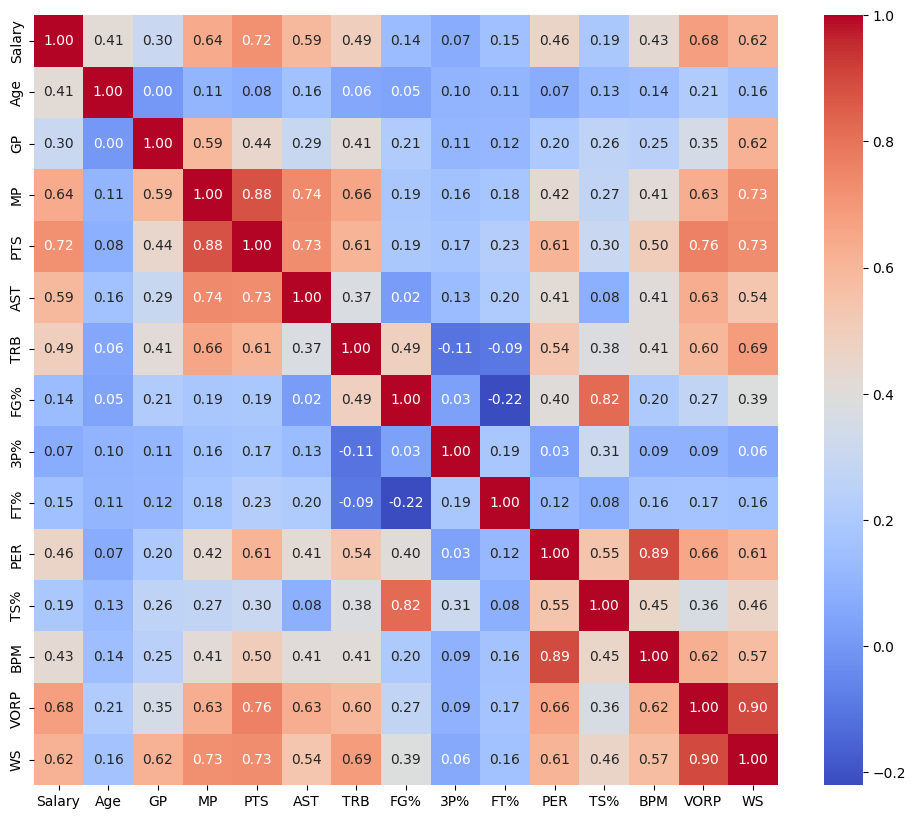

In [14]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_numeric.corr(), cmap="coolwarm", annot=True, fmt=".2f")
plt.show()

### 8.3. <a id='toc8_3_'></a>[Wartości korelacji dla wynagrodzenia](#toc0_)


In [15]:
correlations = df_numeric.corr()
salary_correlations = correlations["Salary"].sort_values(ascending=False)
print(salary_correlations)

Salary    1.000000
PTS       0.719629
VORP      0.677046
MP        0.641961
WS        0.616917
AST       0.589906
TRB       0.493698
PER       0.457899
BPM       0.426828
Age       0.414528
GP        0.303129
TS%       0.192810
FT%       0.152530
FG%       0.135097
3P%       0.071084
Name: Salary, dtype: float64


Powyzsze wartości wskazują na silną korelację zarobków ze średnią ilość punktów na mecz, wskaźnikiem VORP oraz średnią ilością minut na mecz


### 8.4. <a id='toc8_4_'></a>[Wykresy punktowy obrazującę korelacje wynagrodzenia ze średnią ilość punktów na mecz, wskaźnikiem VORP oraz średnią ilością minut na mecz](#toc0_)


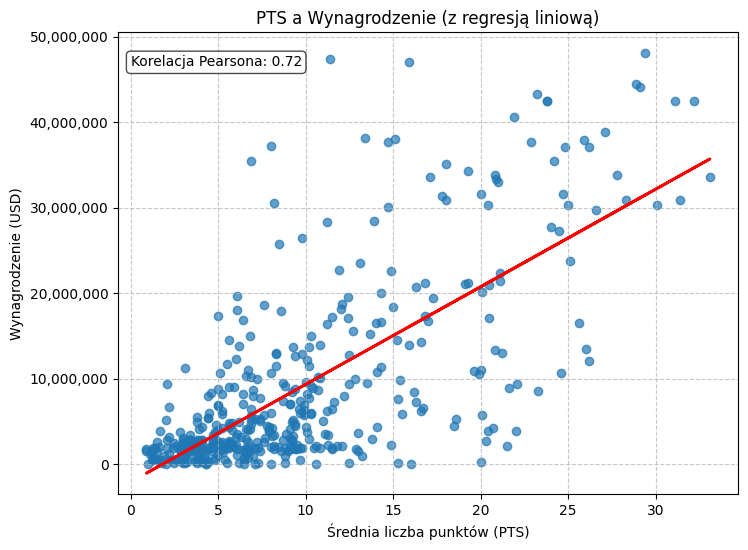

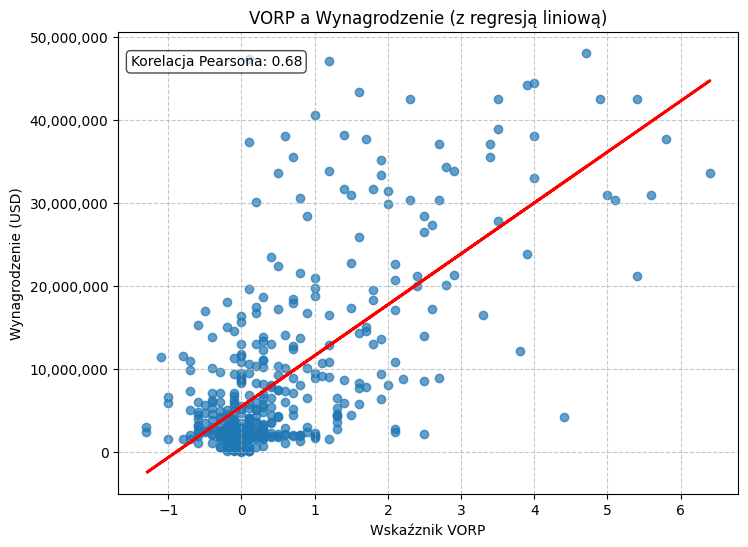

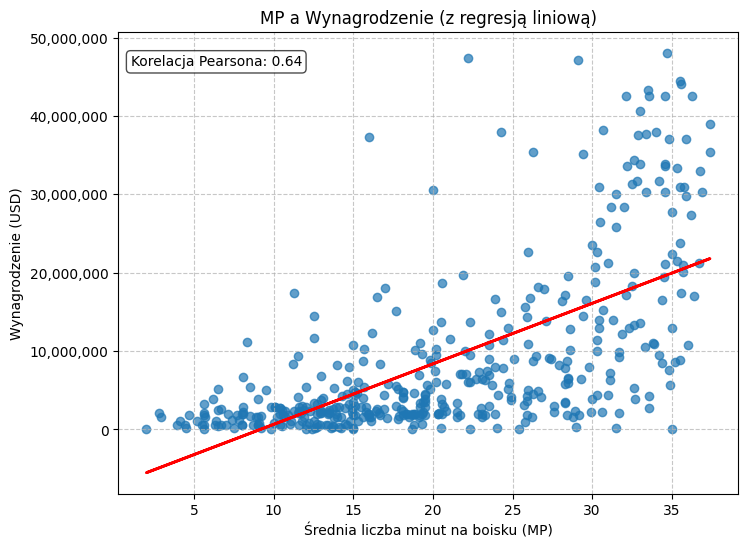

In [16]:
def create_scatter_plot_with_fit(
    x, y, data, x_label, y_label, title, figsize=(8, 6), show_regression=True
):
    plt.figure(figsize=figsize)
    plt.scatter(data[x], data[y], alpha=0.7)

    if show_regression:
        x_values = data[x]
        y_values = data[y]
        coeffs = np.polyfit(x_values, y_values, 1)
        regression_line = np.poly1d(coeffs)
        plt.plot(x_values, regression_line(x_values), color="red", linewidth=2)

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    correlation = data[x].corr(data[y])

    plt.text(
        0.02,
        0.95,
        f"Korelacja Pearsona: {correlation:.2f}",
        transform=plt.gca().transAxes,
        fontsize=10,
        verticalalignment="top",
        bbox=dict(boxstyle="round", facecolor="white", alpha=0.7),
    )

    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))

    plt.grid(True, linestyle="--", alpha=0.7)
    plt.show()


create_scatter_plot_with_fit(
    x="PTS",
    y="Salary",
    data=df,
    x_label="Średnia liczba punktów (PTS)",
    y_label="Wynagrodzenie (USD)",
    title="PTS a Wynagrodzenie (z regresją liniową)",
)
create_scatter_plot_with_fit(
    x="VORP",
    y="Salary",
    data=df,
    x_label="Wskaźznik VORP",
    y_label="Wynagrodzenie (USD)",
    title="VORP a Wynagrodzenie (z regresją liniową)",
)
create_scatter_plot_with_fit(
    x="MP",
    y="Salary",
    data=df,
    x_label="Średnia liczba minut na boisku (MP)",
    y_label="Wynagrodzenie (USD)",
    title="MP a Wynagrodzenie (z regresją liniową)",
)

## 9. <a id='toc9_'></a>[Stworzenie modelów predkcyjnych](#toc0_)

Następnym krokiem, będzie stworzenie modeli, które na podstawie wcześniejgo przeanlizowanego zbioru danych, będą starały się jak najdokładniej przewidywać zarobki zawodników na podstawie podanych danych


### 9.1. <a id='toc9_1_'></a>[Przygotowanie danych pod modele](#toc0_)


Funkcja `prepare_data` przekształca dane do formy gotowej do trenowania modelu:

- **Podział na cechy i zmienną docelową:** Dane są dzielone na wejściowe (X) i wynikowe (y).
- **Standaryzacja cech:** Wszystkie cechy są przekształcane, aby miały średnią 0 i odchylenie standardowe 1 przy użyciu StandardScaler.
- **Podział na zbiory treningowy i testowy:** Dane są dzielone na zbiory do trenowania i testowania modelu w proporcji 80/20.


**Czym jest standaryzacja?**

Standaryzacja to proces skalowania danych, który pozwala wyrównać ich rozkład. Dla każdej cechy wartość jest przekształcana według wzoru:

$$
z = \frac{x - \mu}{\sigma}
​
$$

Gdzie:

- x - wartość oryginalna,
- μ - średnia cechy,
- 𝜎 - odchylenie standardowe cechy,
- z - wartość po standaryzacji


In [17]:
def prepare_data(df, target_column, test_size=0.2, random_state=42):
    X = df.drop(columns=[target_column])
    y = df[target_column]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=test_size, random_state=random_state
    )
    return X, y, X_train, X_test, y_train, y_test


X, y, X_train, X_test, y_train, y_test = prepare_data(
    df_numeric, target_column="Salary"
)

### 9.2. <a id='toc9_2_'></a>[Trening modeli i ocena ich jakości](#toc0_)


Funkcja `plot_model_results`:

- Trenuje model na danych treningowych.
- Generuje predykcje na podstawie danych testowych.
- Oblicza dwie metryki oceny:
  - MAE (Mean Absolute Error): Średnia wartość błędu między przewidywaniami a rzeczywistymi wynikami.
  - R² (R-squared): Miara dopasowania modelu, określająca, jak dobrze model wyjaśnia wariancję danych.
- Wizualizuje wyniki, tworząc wykres porównujący rzeczywiste wartości z przewidywaniami.
- Zwraca obliczone metryki, które można wykorzystać do porównania modeli.


**Czym jest MAE?**

Mean Absolute Error (MAE) to średnia wartość bezwzględnych różnic między przewidywaniami modelu a rzeczywistymi wartościami. Wzór:

$$
MAE = \frac{1}{n}\sum_{i=1}^n |y_i - \hat{y}_i|
$$

Gdzie:

- $y_i$: rzczywista wartość
- $\hat{y}_i$: przwidywana wartość
- $n$: liczba obserwacji

Interpretacja:

- MAE wyrażane jest w tych samych jednostkach co zmienna docelowa.
- Im mniejsze MAE, tym mniejszy średni błąd modelu.


**Czym jest R²?**

R-squared (R²), czyli współczynnik determinacji, mierzy, jaka część wariancji zmiennej docelowej jest wyjaśniana przez model. Wzór:

$$
R^2 = 1 - \frac{\sum_{i=1}^n (y_i - \hat{y}_i)^2}{\sum_{i=1}^n (y_i - \overline{y})^2}
$$

Gdzie:

- $y_i$: rzeczywista wartość
- $\hat{y}_i$: przewidywana wartość
- $\overline{y}$: średnia wartość rzeczywistych danych
- $n$: liczba obserwacji

Interpretacja:

- $R^2 = 1$: Idealne dopasowanie modelu
- $R^2 = 0$: Model nie wyjaśnia żadnej wariancji (losowe przewidywanie).
- $R^2 < 0$: Model działa gorzej niż losowe przewidywanie.


In [18]:
def plot_model_results(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"Wyniki modelu {model_name}:")
    print(f"MAE: ${mae:,.2f}")
    print(f"R²: {r2:.2f}")

    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions, alpha=0.7, color="blue")
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2)
    plt.title(f"{model_name}: Predykcje vs Prawdziwe wartości")
    plt.gca().xaxis.set_major_formatter(FuncFormatter(format_thousands))
    plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))
    plt.xlabel("Prawdziwe wartości")
    plt.ylabel("Predykcje")
    plt.grid(alpha=0.4)
    plt.show()

    return mae, r2

### 9.3. <a id='toc9_3_'></a>[KNeighborsRegressor](#toc0_)


**KNeighborsRegressor** to metoda regresyjna oparta na idei k-NN (k-Nearest Neighbors). Zamiast budować skomplikowany model czy funkcję aproksymującą dane, algorytm ten przechowuje cały zbiór treningowy i podczas przewidywania dla nowego punktu szuka jego najbliższych sąsiadów w przestrzeni cech. Następnie wartość przewidywana jest zwykle średnią wartości docelowych tych sąsiadów.

**Główne założenia:**

1. **Sąsiedztwo:**
   Dla danego punktu x szukamy k najbliższych punktów treningowych w przestrzeni cech. Najczęściej wykorzystuje się odległość euklidesową, choć dostępne są też inne metryki, np. Manhattan czy Minkowski.
2. **Przewidywanie wartości:**
   Po zidentyfikowaniu zbioru sąsiadów $ N_k(x) = \{x_1,x_2,...,x_k\}$ egresor oblicza wartość docelową $\hat{y}$ jako średnią wartości docelowych tych sąsiadów.

$$
\hat{y}(x) = \frac{1}{k} \sum_{x_i \in N_k(x)} y_i
$$


Wyniki modelu KNN:
MAE: $4,079,616.61
R²: 0.70


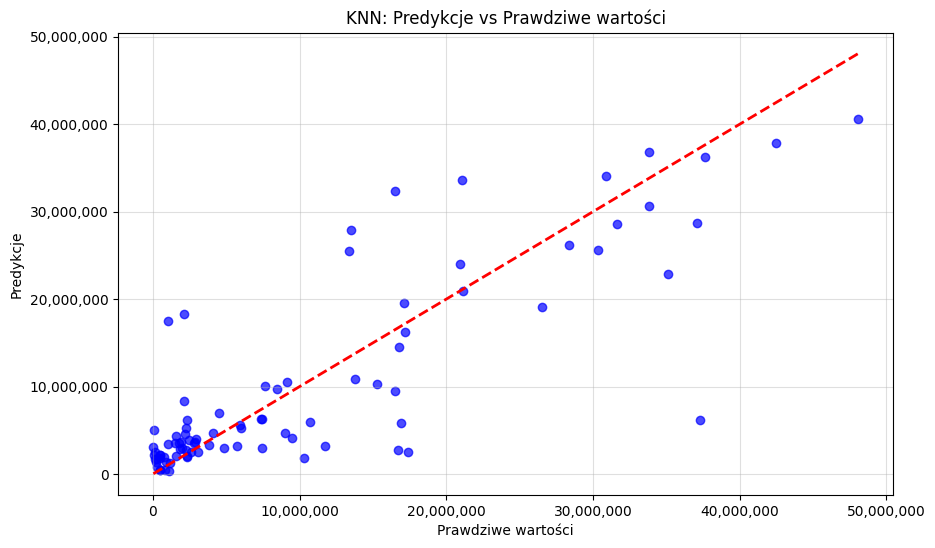

In [24]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_mae, knn_r2 = plot_model_results(knn_model, X_train, y_train, X_test, y_test, "KNN")

### 9.4. <a id='toc9_4_'></a>[LinearRegression](#toc0_)


**LinearRegression** to prosty i szeroko stosowany model uczenia maszynowego do przewidywania wartości numerycznych. Jego głównym celem jest znalezienie liniowej relacji między zmiennymi objaśniającymi (cechami) a zmienną docelową.

**Główne założenia:**
LinearRegression bazuje na prostym założeniu, że zależność między zmiennymi można opisać prostą linią, równaniem płaszczyzny lub hiperpłaszczyzny (w przypadku wielu wymiarów). Model stara się dopasować taki wektor współczynników, aby zminimalizować sumę kwadratów błędów między wartościami przewidywanymi a rzeczywistymi.

**Wzór:**
Dla zbioru cech X i wartości docelowych y, równanie regresji liniowej można zapisać jako:

$$
\hat{y} = \beta_0 + \beta_1x_1 + \beta_2x_2 + \cdots + \beta_px_p
$$

Gdzie:

- $\hat{y}$: przewidywana wartość zmiennej docelowej,
- $x_1,x_2,\cdots,x_p$: cechy
- $\beta_0$: wyraz wolny
- $\beta_1,\beta_2,\cdots,\beta_p$: współczynniki regresji

**Metoda najmniejszych kwadratów:**
Aby znaleźć wartości współczynników β, LinearRegression najczęściej korzysta z metody najmniejszych kwadratów (Ordinary Least Squares). Polega ona na minimalizacji funkcji straty:

$$
\text{SSE} = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2
$$

Gdzie:

- $y_i$: rzeczywista wartość
- $\hat{y}_i$: przewidywana wartość,
- n: liczba obserwacji

Rozwiązaniem problemu jest:

$$
\beta = (X^TX)^{-1}X^Ty
$$


Wyniki modelu Linear Regression:
MAE: $4,939,020.22
R²: 0.68


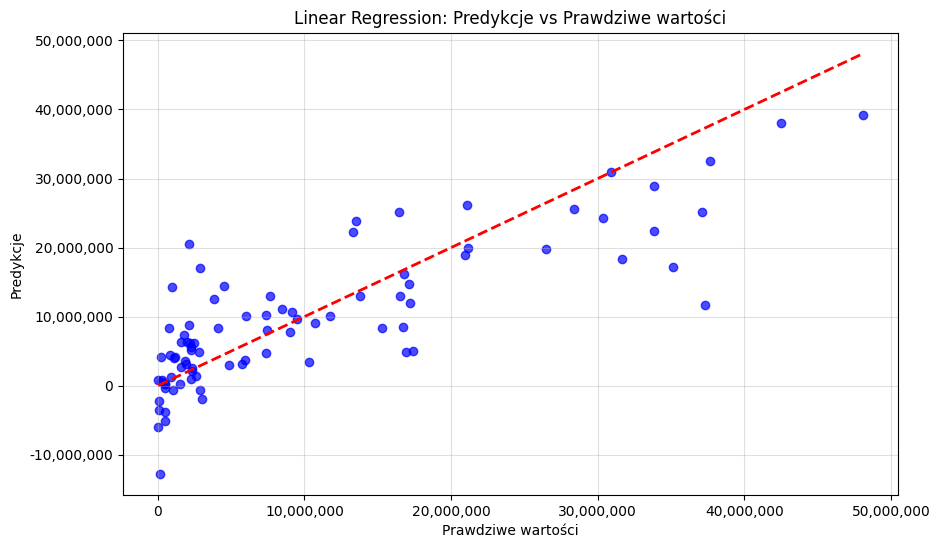

In [20]:
lr_model = LinearRegression()
lr_mae, lr_r2 = plot_model_results(
    lr_model, X_train, y_train, X_test, y_test, "Linear Regression"
)

### 9.5. <a id='toc9_5_'></a>[Porównanie modelów](#toc0_)


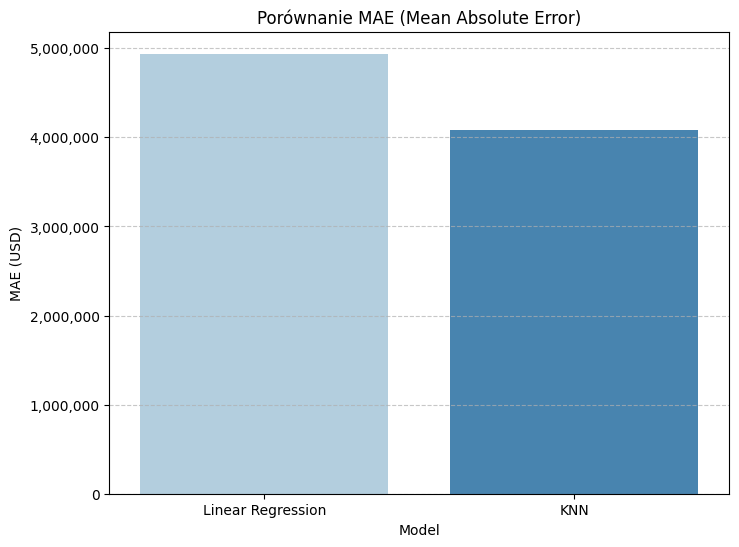

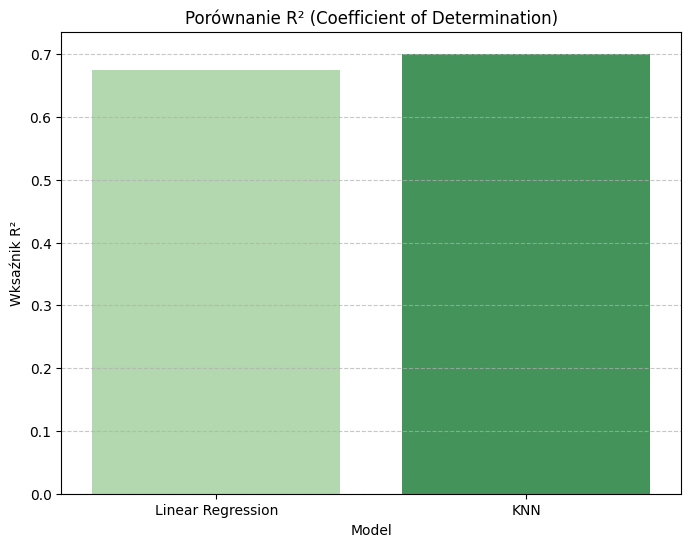

In [30]:
comparison_results = pd.DataFrame(
    {
        "Model": ["Linear Regression", "KNN"],
        "MAE": [lr_mae, knn_mae],
        "R²": [lr_r2, knn_r2],
    }
)

plt.figure(figsize=(8, 6))
sns.barplot(
    x="Model",
    hue="Model",
    legend=False,
    y="MAE",
    data=comparison_results,
    palette="Blues",
)
plt.title("Porównanie MAE (Mean Absolute Error)")
plt.ylabel("MAE (USD)")
plt.xlabel("Model")
plt.gca().ticklabel_format(style="plain", axis="y")
plt.gca().yaxis.set_major_formatter(FuncFormatter(format_thousands))
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

plt.figure(figsize=(8, 6))
sns.barplot(
    x="Model",
    hue="Model",
    legend=False,
    y="R²",
    data=comparison_results,
    palette="Greens",
)
plt.title("Porównanie R² (Coefficient of Determination)")
plt.ylabel("Wksaźnik R²")
plt.xlabel("Model")
plt.gca().ticklabel_format(style="plain", axis="y")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Jak widać na powyzszych wykresach, model uzwyający KNN wykazał się większą dokładnością


## 10. <a id='toc10_'></a>[Wyznaczenie najbardziej przepłaconych i nie dopłaconych zawodników](#toc0_)


Dla modelu KNN, dla kazdego zawodnika zostało obliczone ile potencjalnie kazdy zawodnik, powinien zarabiać i jaka jest to róznica w skali jego aktualnych zarobków


Top 10 Most Overpaid Players (by %):


,Player Name,Age,GP,MP,PTS,AST,TRB,Salary,Predicted_Salary,Difference,Difference_%
70,Jonathan Isaac,25,11,11.300000,5.000000,0.500000,4.000000,"$17,400,000.00","$2,466,187.60","$14,933,812.40",605.54%
78,Collin Sexton,24,48,23.900000,14.300000,2.900000,2.200000,"$16,700,000.00","$2,716,501.20","$13,983,498.80",514.76%
17,Kemba Walker,32,9,16.000000,8.000000,2.100000,1.800000,"$37,281,261.00","$6,228,064.40","$31,053,196.60",498.60%
118,Mo Bamba,24,49,15.700000,6.600000,0.900000,4.600000,"$10,300,000.00","$1,796,343.40","$8,503,656.60",473.39%
162,Cody Martin,27,7,19.100000,5.000000,1.600000,3.400000,"$7,000,000.00","$1,707,800.20","$5,292,199.80",309.88%
105,Danny Green,35,11,12.500000,5.500000,0.500000,1.300000,"$11,710,528.00","$3,226,753.00","$8,483,775.00",262.92%
1,John Wall,32,34,22.200000,11.400000,5.200000,2.700000,"$47,345,760.00","$13,616,856.20","$33,728,903.80",247.70%
82,Malik Beasley,26,81,25.800000,12.700000,1.500000,3.500000,"$15,558,035.00","$4,978,274.80","$10,579,760.20",212.52%
130,Nerlens Noel,28,17,11.500000,2.100000,0.600000,2.700000,"$9,391,069.00","$3,008,570.40","$6,382,498.60",212.14%
76,Duncan Robinson,28,42,16.500000,6.400000,1.100000,1.600000,"$16,902,000.00","$5,822,052.60","$11,079,947.40",190.31%



Top 10 Most Underpaid Players (by %):


,Player Name,Age,GP,MP,PTS,AST,TRB,Salary,Predicted_Salary,Difference,Difference_%
446,Xavier Cooks,27,10,12.600000,3.800000,0.600000,3.800000,"$140,384.00","$3,195,927.00","$-3,055,543.00",-95.61%
391,Kris Dunn,28,22,25.800000,13.200000,5.600000,4.500000,"$1,000,001.00","$17,485,771.00","$-16,485,770.00",-94.28%
309,Desmond Bane,24,58,31.700000,21.500000,4.400000,5.000000,"$2,130,240.00","$18,315,469.20","$-16,185,229.20",-88.37%
430,Orlando Robinson,22,31,13.700000,3.700000,0.800000,4.100000,"$386,055.00","$2,866,789.80","$-2,480,734.80",-86.53%
434,Jarrett Culver,23,10,13.700000,4.400000,0.600000,3.800000,"$260,295.00","$1,636,368.60","$-1,376,073.60",-84.09%
432,Jared Rhoden,23,14,14.100000,3.200000,0.300000,2.600000,"$307,089.00","$1,758,218.80","$-1,451,129.80",-82.53%
353,Tre Jones,23,68,29.200000,12.900000,6.600000,3.600000,"$1,782,621.00","$9,323,825.80","$-7,541,204.80",-80.88%
426,Johnny Juzang,21,18,12.900000,4.800000,0.400000,2.200000,"$508,891.00","$2,349,602.00","$-1,840,711.00",-78.34%
317,Kenrich Williams,28,53,22.800000,8.000000,2.000000,4.900000,"$2,000,000.00","$9,130,660.40","$-7,130,660.40",-78.10%
216,Tyrese Haliburton,22,56,33.600000,20.700000,10.400000,3.700000,"$4,215,120.00","$18,017,037.20","$-13,801,917.20",-76.60%


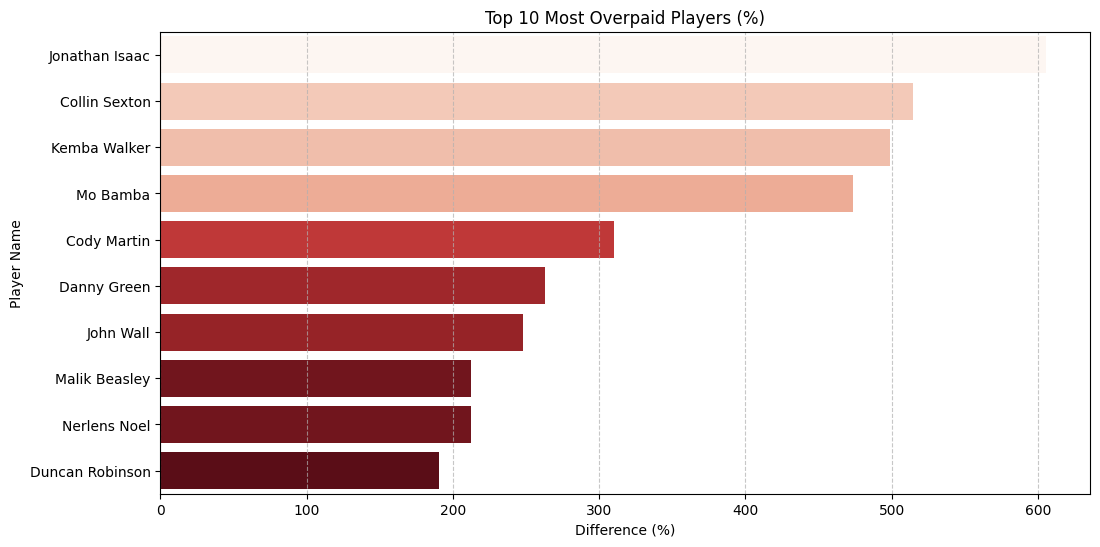

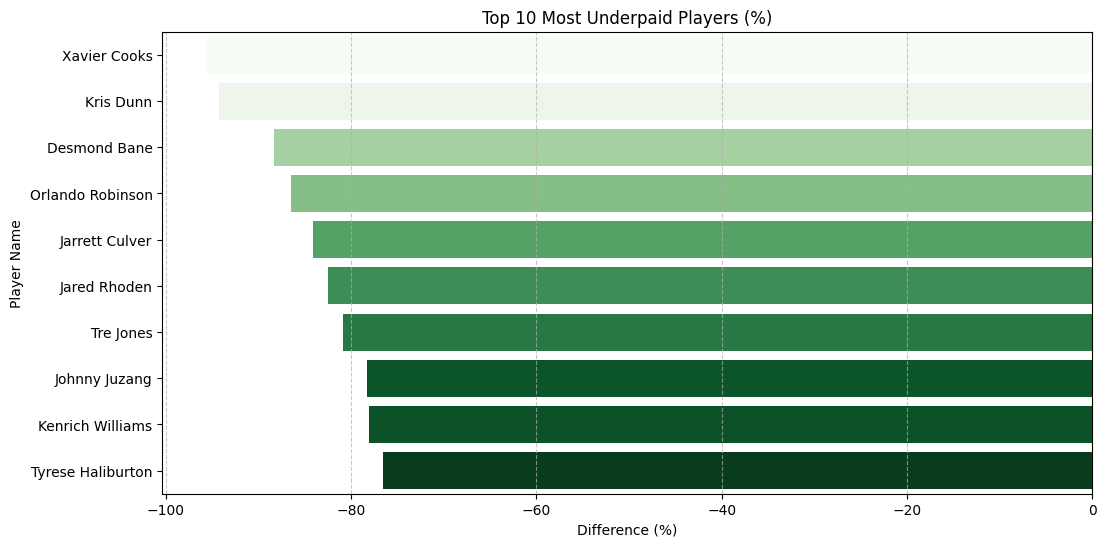

In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

predictions = knn_model.predict(X_scaled)

df["Predicted_Salary"] = predictions
df["Difference"] = df["Salary"] - df["Predicted_Salary"]
df["Difference_%"] = (df["Difference"] / df["Predicted_Salary"]) * 100

cols_to_show = [
    "Player Name",
    "Age",
    "GP",
    "MP",
    "PTS",
    "AST",
    "TRB",
    "Salary",
    "Predicted_Salary",
    "Difference",
    "Difference_%",
]

filtered_df = df[df["GP"] >= 10]

overpaid = df.sort_values("Difference_%", ascending=False).head(10)[cols_to_show]
underpaid = filtered_df.sort_values("Difference_%", ascending=True).head(10)[
    cols_to_show
]

print("Top 10 Most Overpaid Players (by %):")
display(
    overpaid.style.format(
        {
            "Salary": "${:,.2f}",
            "Predicted_Salary": "${:,.2f}",
            "Difference": "${:,.2f}",
            "Difference_%": "{:.2f}%",
        }
    ).background_gradient(cmap="Reds", subset=["Difference_%"])
)

print("\nTop 10 Most Underpaid Players (by %):")
display(
    underpaid.style.format(
        {
            "Salary": "${:,.2f}",
            "Predicted_Salary": "${:,.2f}",
            "Difference": "${:,.2f}",
            "Difference_%": "{:.2f}%",
        }
    ).background_gradient(cmap="Greens", subset=["Difference_%"])
)


plt.figure(figsize=(12, 6))
sns.barplot(
    x="Difference_%",
    y="Player Name",
    hue="Difference_%",
    legend=False,
    data=overpaid,
    palette="Reds_r",
)
plt.title("Top 10 Most Overpaid Players (%)")
plt.xlabel("Difference (%)")
plt.ylabel("Player Name")
plt.grid(True, axis="x", linestyle="--", alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(
    x="Difference_%",
    y="Player Name",
    hue="Difference_%",
    legend=False,
    data=underpaid,
    palette="Greens",
)
plt.title("Top 10 Most Underpaid Players (%)")
plt.xlabel("Difference (%)")
plt.ylabel("Player Name")
plt.grid(True, axis="x", linestyle="--", alpha=0.7)
plt.show()